In [ ]:
Никитина Наталья, РИМ-181226.

# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']

In [2]:
def funct_PCA(D, alpha):
    Z = [(D[:,i] - D[:,i].mean()) for i in range(D.shape[1])]
    K = np.cov(Z)
    Lambda, U = np.linalg.eig(K)
    fr = sum(Lambda[:alpha])/sum(Lambda)
    U_r = U[:,:alpha]
    return [np.dot(U_r.transpose(), Z), Lambda, fr]

Доля общей дисперсии: 0.9776317750248031


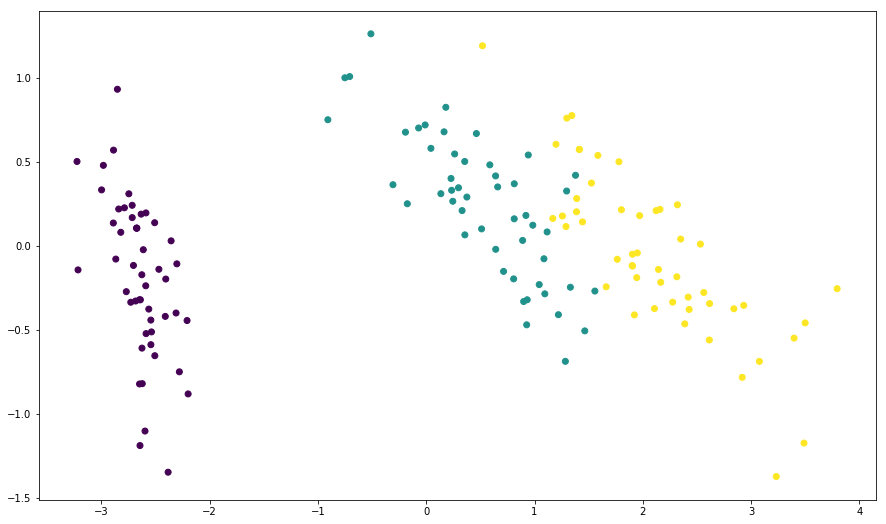

In [3]:
import matplotlib

funct_res = funct_PCA(x, 2)

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.figure()
plt.scatter(funct_res[0][0], funct_res[0][1],c=y)

print("Доля общей дисперсии: " + str(funct_res[2]))

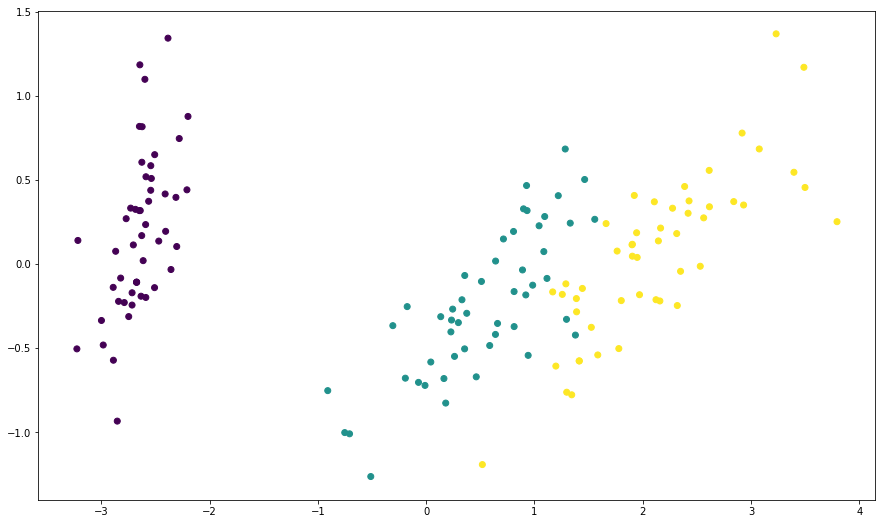

In [4]:
from sklearn.decomposition import PCA

sklearn_res = PCA(n_components=2).fit_transform(x)

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)
plt.figure()
plt.scatter(sklearn_res[:,0], sklearn_res[:,1],c=y)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

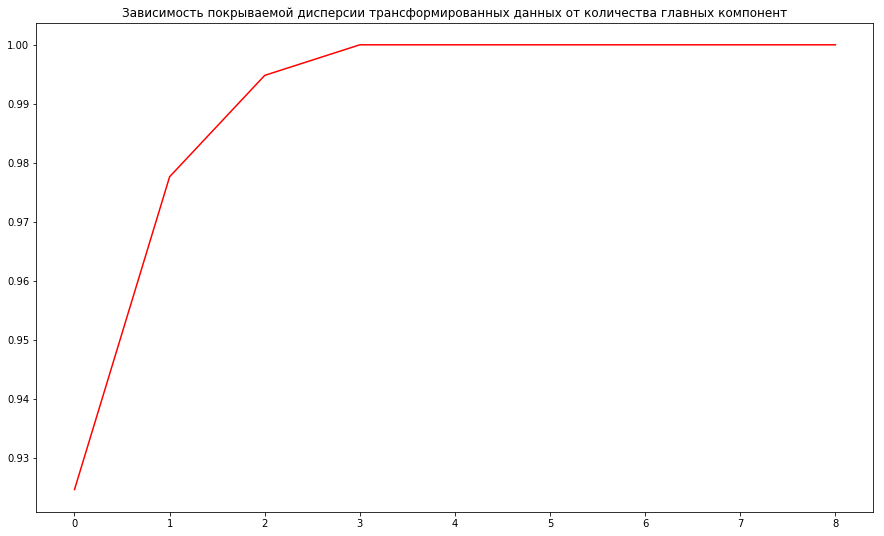

In [5]:
var_list = [funct_PCA(x, i)[2] for i in range(1,10)]
plt.plot(var_list,c='red')
plt.title('Зависимость покрываемой дисперсии трансформированных данных от количества главных компонент')
plt.show()

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [6]:
from math import sqrt

def funct_corr_pearson(xj,xk):
    num = sum([(xj[i]-xj.mean())*(xk[i]-xk.mean()) for i in range(xj.shape[0])])
    den = sqrt(sum([pow((xj[i]-xj.mean()),2) for i in range(xj.shape[0])])*sum([pow((xk[i]-xk.mean()),2) for i in range(xk.shape[0])]))
    if den == 0: return 0
    return num / den

In [7]:
for attr in range(4):
    print(f'Корреляция данных с компонентами 1 и 2 для стобца {attr}: {round(funct_corr_pearson(funct_res[0][0], x[:,attr]),3)}, {round(funct_corr_pearson(funct_res[0][1], x[:,attr]),3)}')

Корреляция данных с компонентами 1 и 2 для стобца 0: 0.898, -0.39
Корреляция данных с компонентами 1 и 2 для стобца 1: -0.39, -0.828
Корреляция данных с компонентами 1 и 2 для стобца 2: 0.998, 0.049
Корреляция данных с компонентами 1 и 2 для стобца 3: 0.966, 0.048
